In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Simulated scores
y_true = np.array([1]*6 + [0]*10)  # 6 fraud (positive), 10 normal (negative)
y_scores = np.array([0.95, 0.85, 0.6, 0.55, 0.4, 0.3,   # actual positives
                     0.9, 0.8, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.0])  # actual negatives

thresholds = np.arange(0.0, 1.01, 0.1)  # 0.0 to 1.0


In [2]:
def tpr_fpr(y_true, y_scores, threshold):
    # Predict positive if score >= threshold
    y_pred = (y_scores >= threshold).astype(int)
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Confusion matrix elements
    TN, FP, FN, TP = cm.ravel()
    
    TPR = TP / (TP + FN)  # Recall
    FPR = FP / (FP + TN)
    
    return TPR, FPR, cm


In [3]:
print("Thresh | TPR   | FPR   | TP FN FP TN")
for th in thresholds:
    tpr, fpr, cm = tpr_fpr(y_true, y_scores, th)
    TN, FP, FN, TP = cm.ravel()
    print(f"{th:.1f}    | {tpr:.2f} | {fpr:.2f} | {TP} {FN} {FP} {TN}")


Thresh | TPR   | FPR   | TP FN FP TN
0.0    | 1.00 | 1.00 | 6 0 10 0
0.1    | 1.00 | 0.70 | 6 0 7 3
0.2    | 1.00 | 0.60 | 6 0 6 4
0.3    | 0.83 | 0.40 | 5 1 4 6
0.4    | 0.83 | 0.40 | 5 1 4 6
0.5    | 0.67 | 0.30 | 4 2 3 7
0.6    | 0.33 | 0.20 | 2 4 2 8
0.7    | 0.33 | 0.20 | 2 4 2 8
0.8    | 0.33 | 0.20 | 2 4 2 8
0.9    | 0.17 | 0.10 | 1 5 1 9
1.0    | 0.00 | 0.00 | 0 6 0 10


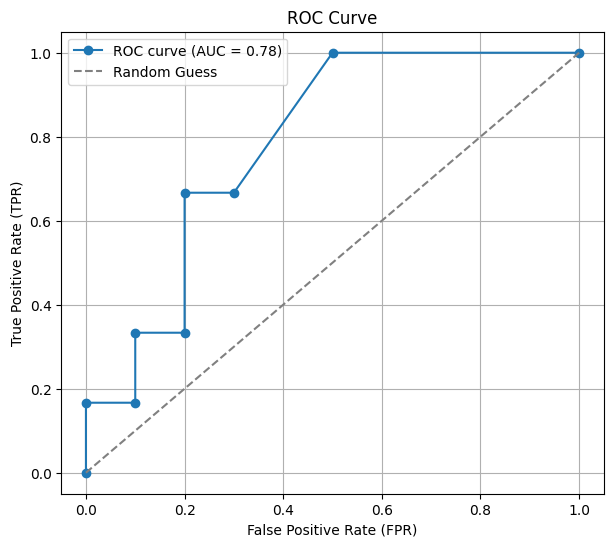

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Using sklearn to get FPR, TPR
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, marker='o', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()